In [2]:
import sys
sys.path.append('D:\Programs\Anaconda2\Lib\site-packages')

%matplotlib inline 

from collections import defaultdict

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import requests
from pattern import web
import math as m

In [3]:
url = 'http://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population'
website_html = requests.get(url).text
#print website_html

In [4]:
def get_population_html_tables(html):
    """Parse html and return html tables of wikipedia population data."""
    dom = web.Element(html)
#    tbls = dom('table') #all the tables
    tbls=dom.by_class('sortable wikitable')  #the tables we want
    return tbls

tables = get_population_html_tables(website_html)
print "table length: %d" %len(tables)
for t in tables:
    print t.attributes

table length: 3
{u'style': u'text-align: right', u'class': u'sortable wikitable'}
{u'style': u'text-align: right', u'class': u'sortable wikitable'}
{u'style': u'text-align: right', u'class': u'sortable wikitable'}


In [5]:
def table_type1(tbl): # extract the table type
    return tbl('th')[1].content

def table_type2(tbl): # extract the table type a different way
    headers = [th.content for th in tbl.by_tag('th')]
#    type(headers)
    return headers[1]

print table_type1(tables[0])
print table_type1(tables[1])
print table_type1(tables[2])

Country (or dependent territory)
Country (or dependent territory)
Country (or dependent territory)


In [6]:
tables_by_type1 = defaultdict(list)
for t in tables:
    tables_by_type1[table_type1(t)].append(t)
"""now I have a dictionary with one key and an array of values associated with it"""
    
print tables_by_type1

defaultdict(<type 'list'>, {u'Country (or dependent territory)': [Element(tag=u'table'), Element(tag=u'table'), Element(tag=u'table')]})


In [7]:
"""alternate way of doing this"""
table_by_type2 = defaultdict(list)
for t in tables:
    typ = table_type2(t)
    if typ not in table_by_type2:
        table_by_type2[typ] = list()
    table_by_type2[typ].append(t)
    
print table_by_type2

defaultdict(<type 'list'>, {u'Country (or dependent territory)': [Element(tag=u'table'), Element(tag=u'table'), Element(tag=u'table')]})


In [8]:
def get_countries_population(tables):
    """extract population data from each table and store it in dictionary."""
    
    result = defaultdict(dict)

    for tbl in tables:
        headers = tbl('tr')
        first_header = headers[0]
        th_s = first_header('th')
    
        years = [int(val.content) for val in th_s if val.content.isnumeric()]
        year_indices = [idx for idx, val in enumerate(th_s) if val.content.isnumeric()]
        # 2. step: iterate over all tables, extract headings and actual data and combine data into single dict
        rows = tbl('tr')[1:]
        for row in rows:
            tds = row('td')
            country_name = tds[1]('a')[0].content
            population_by_year=[]
            for colidx in year_indices:
                popu=tds[colidx].content.replace(',', '')
                if popu[0] == '<': #check if the item is bold
                    popu = popu[3:-4] #remove the bold tags
                population_by_year.append(int(popu)/1000.0) #convert to units of millions
            subdict = dict(zip(years, population_by_year))
            #print zip(years,population_by_year)
            result[country_name].update(subdict)
    
    return result


result = get_countries_population(tables_by_type1['Country (or dependent territory)'])
print result


defaultdict(<type 'dict'>, {u'Canada': {1985: 25.942, 2050: 41.136, 1955: 16.051, 2020: 36.388, 1990: 27.791, 1960: 18.267, 2025: 37.559, 1995: 29.691, 1965: 20.072, 2030: 38.565, 2000: 31.1, 1970: 21.75, 2035: 39.396, 2005: 32.387, 1975: 23.21, 2040: 40.071, 2010: 33.76, 1980: 24.594, 2045: 40.636, 1950: 14.012, 2015: 35.1}, u'Saint Martin': {1985: 0.016, 2050: 0.035, 1955: 0.004, 2020: 0.033, 1990: 0.031, 1960: 0.005, 2025: 0.034, 1995: 0.033, 1965: 0.005, 2030: 0.034, 2000: 0.029, 1970: 0.006, 2035: 0.034, 2005: 0.028, 1975: 0.007, 2040: 0.035, 2010: 0.031, 1980: 0.008, 2045: 0.035, 1950: 0.003, 2015: 0.032}, u'Guernsey': {1985: 0.056, 2050: 0.067, 1955: 0.047, 2020: 0.068, 1990: 0.063, 1960: 0.047, 2025: 0.068, 1995: 0.061, 1965: 0.051, 2030: 0.069, 2000: 0.062, 1970: 0.054, 2035: 0.068, 2005: 0.064, 1975: 0.054, 2040: 0.068, 2010: 0.065, 1980: 0.054, 2045: 0.068, 1950: 0.046, 2015: 0.067}, u'Lithuania': {1985: 3.588, 2050: 1.802, 1955: 2.615, 2020: 2.732, 1990: 3.684, 1960: 2.765,

In [9]:
"""convert dictionary to dataframe"""
dataframe=pd.DataFrame.from_dict(result,orient='index')
dataframe.sort_index(axis=1,inplace=True)
print dataframe

                                  1950      1955      1960      1965  \
Afghanistan                      8.151     8.892     9.830    10.998   
Albania                          1.228     1.393     1.624     1.884   
Algeria                          8.893     9.842    10.910    11.964   
American Samoa                   0.020     0.020     0.021     0.025   
Andorra                          0.007     0.007     0.009     0.014   
Angola                           4.118     4.424     4.798     5.135   
Anguilla                         0.006     0.006     0.006     0.006   
Antigua and Barbuda              0.046     0.052     0.055     0.060   
Argentina                       17.151    18.928    20.617    22.284   
Armenia                          1.356     1.566     1.869     2.206   
Aruba                            0.050     0.054     0.058     0.060   
Australia                        8.268     9.278    10.362    11.440   
Austria                          6.936     6.947     7.048     7

In [10]:
print "length"
print len(dataframe.index)

subtable = dataframe.iloc[30:35,0:3]
print "subtable"
print subtable
print ""

column = dataframe[2020]
print column
print ""

row = dataframe.ix[30]
print "row"
print row
print ""

rows = dataframe.ix[30:35]
print "rows"
print rows
print ""

element = dataframe.ix[0,1955]
print "element"
print element
print ""

print "max"
print dataframe[2050].argmax()
print dataframe[2050].max()
print ""

print "axes"
print dataframe.axes
print ""

row = dataframe.ix[0]
print "row info"
print row.name
print row.index
print ""

countries = dataframe.index
print "countries"
print countries
print ""

print "Yemen"
print dataframe.ix['Yemen']

length
228
subtable
               1950   1955   1960
Bulgaria      7.251  7.500  7.868
Burkina Faso  4.377  4.615  4.866
Burundi       2.363  2.577  2.816
Cambodia      4.472  5.049  5.762
Cameroon      4.888  5.211  5.609

Afghanistan                       36.644
Albania                            3.075
Algeria                           42.973
American Samoa                     0.054
Andorra                            0.086
Angola                            22.485
Anguilla                           0.019
Antigua and Barbuda                0.099
Argentina                         45.379
Armenia                            3.022
Aruba                              0.120
Australia                         23.939
Austria                            8.860
Azerbaijan                        10.206
Bahamas                            0.338
Bahrain                            1.506
Bangladesh                       183.109
Barbados                           0.295
Belarus                            9.

In [11]:
import matplotlib as mpl

"unsorted top 5 populated african countries"
highPOP = ['Democratic Republic of the Congo','Ethiopia',
           'Nigeria','South Africa','Egypt']

"GDP per capita (sorted, where Equatorial Guinea is highest)"
highGDP = ['Seychelles','Equatorial Guinea','Gabon',
           'Botswana','Libya','Mauritius']
highGDPval = [23200,20581,14500,14000,14000,14000]

lowGDP = ['Democratic Republic of the Congo','Burundi',
          'Zimbabwe','Liberia','Eritrea','Somalia']
lowGDPval = [300,300,500,500,600,600]

so1 = [dataframe.ix[highPOP[i]][2015] for i in range(0,len(highPOP))]

def zipsort(array,sortorder):
    sort = sorted(zip(sortorder,array),reverse=True)
    return sort
print "after zip and sort:"
sort = zipsort(highPOP,so1)
print sort
print ""
new_africas = np.array(sort).ravel()
highPOP = new_africas[1::2]
print "now the countries are sorted by max pop. as of 2015"
print highPOP

after zip and sort:
[(181.56299999999999, 'Nigeria'), (99.465999999999994, 'Ethiopia'), (88.488, 'Egypt'), (79.376000000000005, 'Democratic Republic of the Congo'), (53.676000000000002, 'South Africa')]

now the countries are sorted by max pop. as of 2015
['Nigeria' 'Ethiopia' 'Egypt' 'Democratic Republic of the Congo'
 'South Africa']


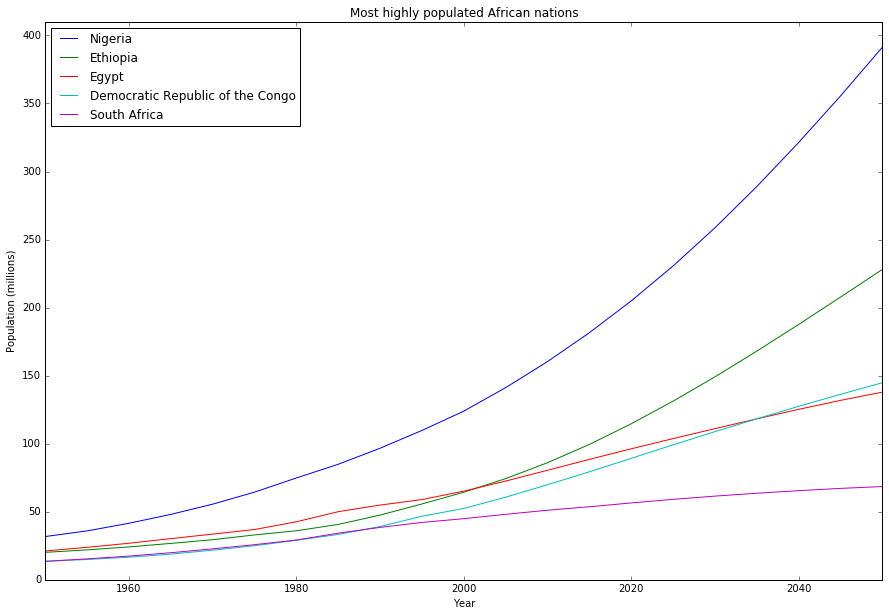

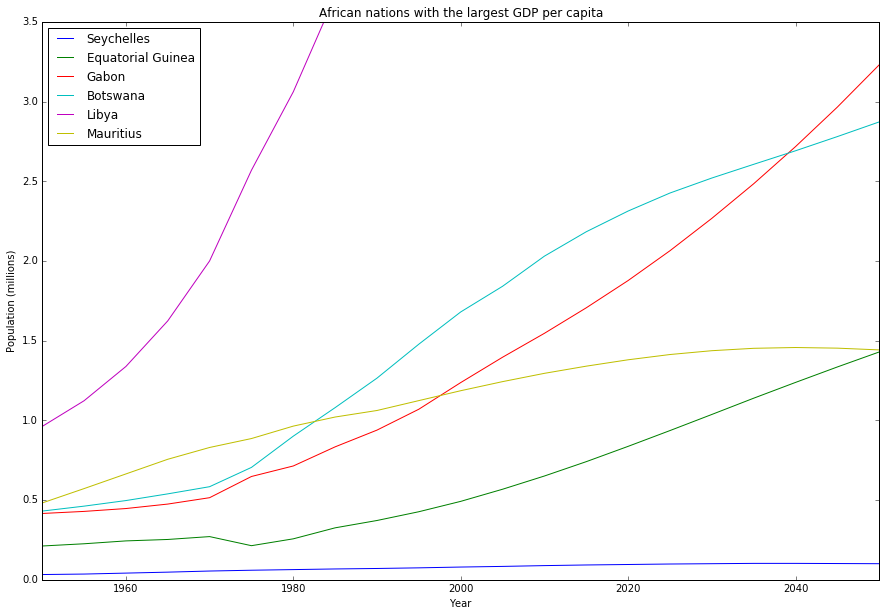

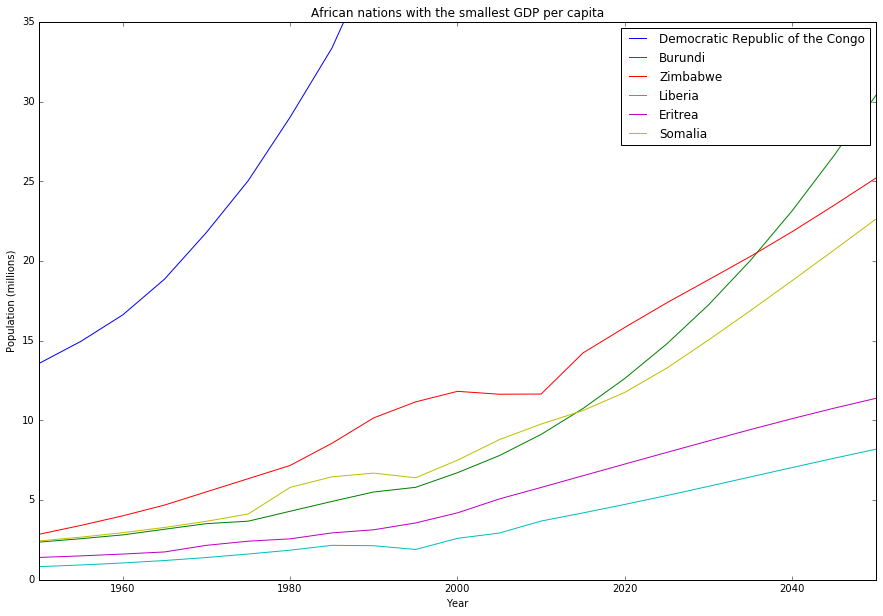

In [12]:
def plotpop(x1,x2,y1,y2,africas,title):
    """resize figure"""
    rcParams['figure.figsize'] = 15,10

    for country in africas:
        row = dataframe.ix[country]
        plt.plot(row.index,row,label=row.name)

    plt.xlim(xmin=x1,xmax=x2)
    plt.ylim(ymin=y1,ymax=y2)

    plt.xticks(rotation=0)
    plt.legend(loc='best')
    plt.xlabel("Year")
    plt.ylabel("Population (millions)")
    plt.title(title)
    plt.show()
    
plotpop(1950,2050,0,410,highPOP,"Most highly populated African nations")
plotpop(1950,2050,0,3.5,highGDP,"African nations with the largest GDP per capita")
plotpop(1950,2050,0,35,lowGDP,"African nations with the smallest GDP per capita")

label overlap,
shifting
Botswana
down


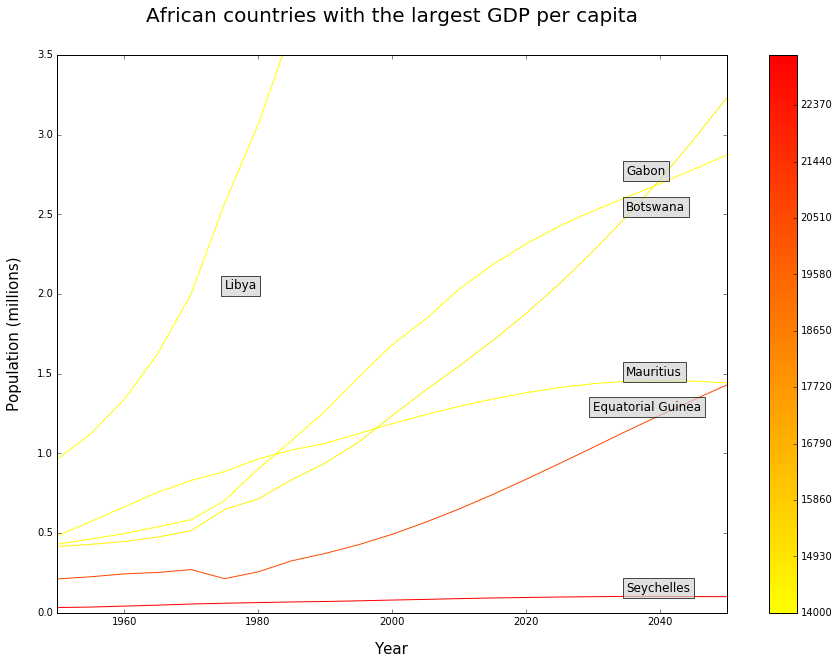

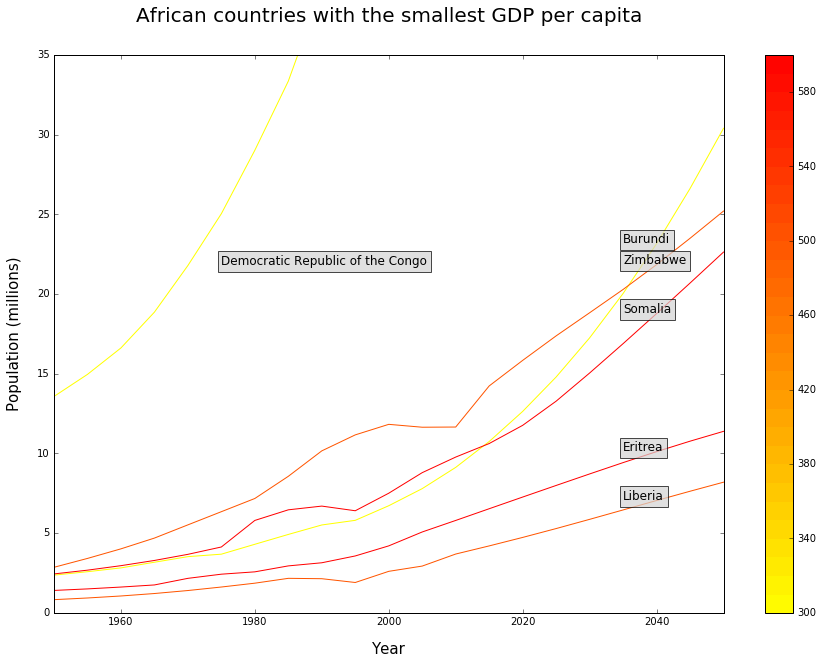

In [41]:
def plotpopcolor(x1,x2,y1,y2,africas,z,z1,z2,title,label):
    """plotting with a heat map for GDP"""
    rcParams['figure.figsize'] = 15,10 #resize figure

    min,max = (z1,z2)
    step = 10
    # setting up a colormap gradient
    mymap = mpl.colors.LinearSegmentedColormap.from_list('mycolors',['yellow','red'])

    # getting colourbar information with a countour plot
    Z = [[0,0],[0,0]]
    levels = range(min,max+step,step)
    CS3 = plt.contourf(Z,levels,cmap=mymap)
    plt.clf()
    
    box = dict(boxstyle='square', facecolor='lightgrey', alpha=0.7)
    
    i = 0
    lastmark=10.0
    for country in africas:
        row = dataframe.ix[country]
        r = 1
        g = (max-float(z[i]))/(max-min)
        b = 0
        plt.plot(row.index, row, label=row.name, color=(r,g,b))
        i += 1
    
    if label == True:
        # for labeling the plot
        yearmark = 2040
        min_space = 0.03
        extra_space = 0.03
        i = 0
        for country in africas:
            row = dataframe.ix[country]
            thismark = dataframe.ix[country,2040]
            thisfinal = dataframe.ix[country,2050]
            if dataframe.ix[country,2050] > y2: #if the final point is too high
                plt.text(row.index[5], row[1970]+extra_space, row.name, bbox=box, fontsize=12)
            elif abs(thismark-lastmark)/(y2-y1) > min_space:
                shift = 0
                if len(country) > 15:
                    shift = -1
                plt.text(row.index[-4+shift], row[yearmark]+extra_space, row.name, bbox=box, fontsize=12)
            elif abs(thismark-lastmark)/(y2-y1) < min_space:
                print "label overlap,"
                print "shifting"
                print country
                """selecting which one should be on top"""
                if thisfinal >= lastfinal:
                    pm = 1.0
                    print "up"
                else:
                    pm = -1.0
                    print "down"
                plt.text(row.index[-4],row[yearmark]+pm*(y2-y1)*1.6*min_space,row.name,bbox=box,fontsize=12)
            lastmark = thismark
            lastfinal = thisfinal
            i += 1
    
    plt.xlim(xmin=x1,xmax=x2)
    plt.ylim(ymin=y1,ymax=y2)

    plt.xlabel("Year", fontsize=15, labelpad=15)
    plt.ylabel("Population (millions)", fontsize=15, labelpad=15)
    plt.title(title, fontsize=20, y=1.05)
    plt.colorbar(CS3)
    plt.show()

plotpopcolor(1950,2050,0,3.5,highGDP,highGDPval,14000,23200,"African countries with the largest GDP per capita",True)
plotpopcolor(1950,2050,0,35,lowGDP,lowGDPval,300,600,"African countries with the smallest GDP per capita",True)

In [14]:
"""import the 2014 GDP per capita for all countries"""
url2 = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita'
website_html2 = requests.get(url2).text
#print website_html

In [15]:
def get_population_html_tables(html):
    dom = web.Element(html)
#    tbls = dom('table') #all the tables
    tbls=dom.by_class('wikitable sortable')  #the tables we want
    return tbls

tables2 = get_population_html_tables(website_html2)
print "table length: %d" %len(tables2)
for t in tables2:
    print t.attributes

table length: 3
{u'style': u'margin-left:auto;margin-right:auto;text-align: right', u'class': u'wikitable sortable'}
{u'style': u'margin-left:auto;margin-right:auto;text-align: right', u'class': u'wikitable sortable'}
{u'style': u'margin-left:auto;margin-right:auto;text-align: right', u'class': u'wikitable sortable'}


In [16]:
def get_countries_GDP(table):
    
    result = defaultdict(dict)

    rows = table[0]('tr') # [0] because we only want the first (of three) tables on the page
    rows = rows[1:] # ignore headers 
    for row in rows:
        country_name = row('td')[1]('a')[0].content
        GDP = row('td')[2].content.replace(',','')
        result[country_name] = int(GDP)    
    return result

result2 = get_countries_GDP(tables2)
print result2


defaultdict(<type 'dict'>, {u'Canada': 44967, u'Turkmenistan': 14217, u'Lithuania': 27259, u'Cambodia': 3276, u'Ethiopia': 1642, u'Swaziland': 9553, u'Belize': 8333, u'Argentina': 22302, u'Bolivia': 6224, u'Bahamas, The': 25075, u'Burkina Faso': 1688, u'Bahrain': 49020, u'Saudi Arabia': 52311, u'Jordan': 11971, u'Cape Verde': 6424, u'Slovenia': 29867, u'Guatemala': 7550, u'Bosnia and Herzegovina': 9892, u'Guinea': 1257, u'World': 14982, u'Congo, Rep.': 6635, u'Spain': 33835, u'Liberia': 886, u'Netherlands': 47960, u'Paraguay': 8476, u'Pakistan': 4749, u'Oman': 43847, u'Tanzania': 2742, u'Gabon': 20757, u'New Zealand': 35305, u'Yemen': 3788, u'Jamaica': 8610, u'Albania': 11391, u'Samoa': 5199, u'United Arab Emirates': 66347, u'Kosovo': 9281, u'India': 5808, u'Azerbaijan': 17761, u'Madagascar': 1445, u'Lesotho': 2918, u'Saint Vincent and the Grenadines': 10684, u'Kenya': 3099, u'South Korea': 35379, u'Tajikistan': 2698, u'Turkey': 19698, u'Afghanistan': 1944, u'Czech Republic': 30047, u'

In [17]:
"""convert GDP dictionary to dataframe"""
dataframe2 = pd.DataFrame.from_dict(result2,orient='index')
dataframe2.sort_index(axis=0,inplace=True)
print dataframe2[0]

Afghanistan                1944
Albania                   11391
Algeria                   13888
Angola                     7270
Antigua and Barbuda       22998
Argentina                 22302
Armenia                    8164
Australia                 46550
Austria                   46640
Azerbaijan                17761
Bahamas, The              25075
Bahrain                   49020
Bangladesh                 3391
Barbados                  16365
Belarus                   18246
Belgium                   43139
Belize                     8333
Benin                      1875
Bhutan                     7662
Bolivia                    6224
Bosnia and Herzegovina     9892
Botswana                  17050
Brazil                    16155
Brunei                    79890
Bulgaria                  17926
Burkina Faso               1688
Burundi                     914
Cambodia                   3276
Cameroon                   3007
Canada                    44967
                          ...  
Swazilan

In [18]:
print "dataframe point:"
print dataframe2.ix[7]
print ""
print "integer data point:"
print dataframe2.ix[7][0]

dataframe point:
0    46550
Name: Australia, dtype: int64

integer data point:
46550


In [19]:
def compare(list1,list2):
    for value in list1:
        if value not in list2:
             print value
print "These countries from the population dataframe have no GDP match:"
compare(dataframe.index,dataframe2.index)
print ""
print "These countries from the GDP dataframe have no population match:"
compare(dataframe2.index,dataframe.index)

These countries from the population dataframe have no GDP match:
American Samoa
Andorra
Anguilla
Aruba
Bahamas
Bermuda
British Virgin Islands
Cayman Islands
Cook Islands
Cuba
Curaçao
Democratic Republic of the Congo
Faroe Islands
Federated States of Micronesia
French Polynesia
Gambia
Gibraltar
Greenland
Guam
Guernsey
Isle of Man
Ivory Coast
Jersey
Liechtenstein
Macau
Monaco
Montserrat
Nauru
New Caledonia
North Korea
Northern Mariana Islands
Palestine
Puerto Rico
Republic of the Congo
Saint Barthélemy
Saint Helena, Ascension and Tristan da Cunha
Saint Martin
Saint Pierre and Miquelon
Sint Maarten
Somalia
Syria
Turks and Caicos Islands
United States Virgin Islands
Wallis and Futuna
Western Sahara

These countries from the GDP dataframe have no population match:
Bahamas, The
Congo, Dem. Rep.
Congo, Rep.
Côte d'Ivoire
Gambia, The
Micronesia


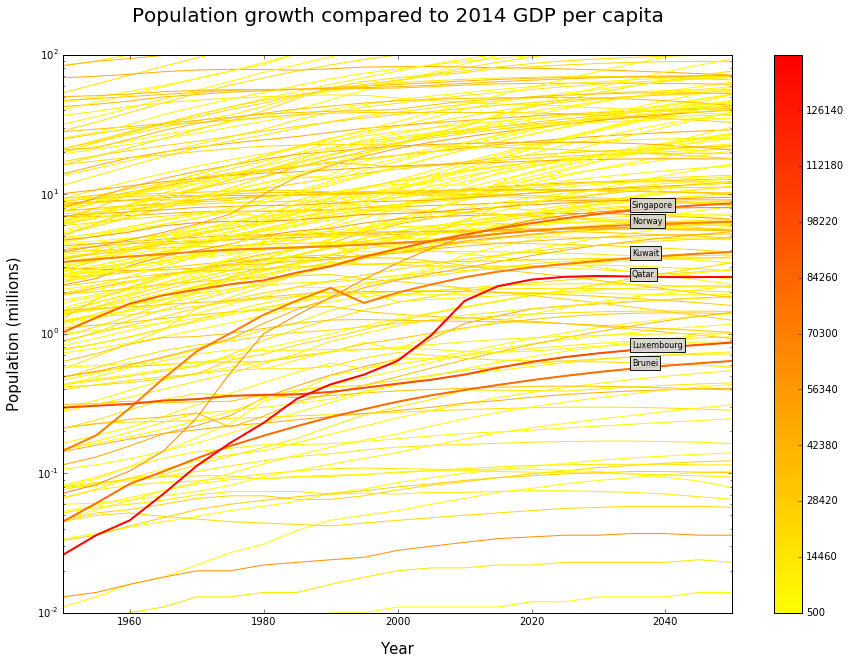

In [40]:
"""make a new list of coutries and build a new plot"""
all_countries = [country for country in dataframe.index if country in dataframe2.index]
all_GDP = [dataframe2.ix[country][0] for country in all_countries]

def plotpoplogcolor(x1,x2,y1,y2,country_list,z,z1,z2,title,label):
    rcParams['figure.figsize'] = 15,10 #resize figure

    min,max = (z1,z2)
    step = 10
    # setting up a colormap gradient
    mymap = mpl.colors.LinearSegmentedColormap.from_list('mycolors',['yellow','red'])

    # getting colourbar information with a countour plot
    Z = [[0,0],[0,0]]
    levels = range(min,max+step,step)
    CS3 = plt.contourf(Z,levels,cmap=mymap)
    plt.clf()
    
    box = dict(boxstyle='square', facecolor='lightgrey', alpha=0.9)
    
    i = 0
    lastmark = 10.0
    lastfinal = 10.0
    for country in country_list:
        row = dataframe.ix[country]
        r = 1
        g = (max-float(z[i]))/(max-min)
        b = 0
        plt.semilogy(row.index, row, label=row.name, color=(r,g,b))
        i += 1
    
    if label == True:
        # for labeling the plot
        yearmark = 2040
        min_space = 0.03
        extra_space = 0.03
        i = 0
        for country in country_list:
            if all_GDP[i] > 67000:
                row = dataframe.ix[country]
                r, g, b = 1, (max-float(z[i]))/(max-min), 0
                plt.semilogy(row.index, row, label=row.name, color=(r,g,b), linewidth=2) # to make the lines more prominent
                plt.text(row.index[-4],row[yearmark],row.name,bbox=box,fontsize=8)
            i += 1

    plt.xlim(xmin=x1,xmax=x2)
    plt.ylim(ymin=y1,ymax=y2)

    plt.xlabel("Year", fontsize=15, labelpad=15)
    plt.ylabel("Population (millions)", fontsize=15, labelpad=15)
    plt.title(title, fontsize=20, y=1.05)
    plt.colorbar(CS3)
    plt.show()
    
plotpoplogcolor(1950,2050,0.01,100,all_countries,all_GDP,int(min(all_GDP)/100)*100-100,int(m.ceil(max(all_GDP)/10000)*10000)+10000,"Population growth compared to 2014 GDP per capita",True)

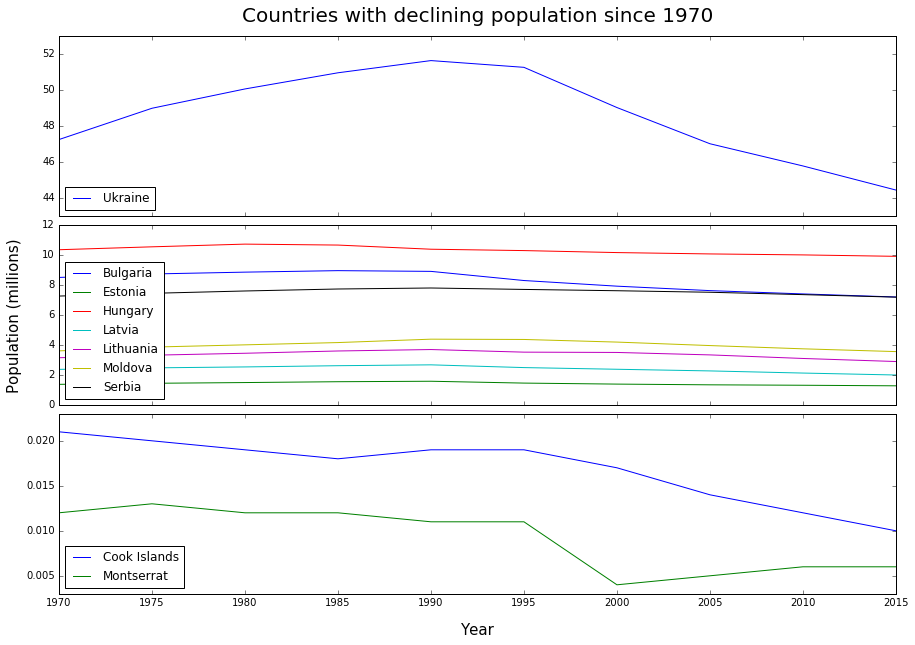

In [38]:
d_countries = [country for country in dataframe.index if dataframe.ix[country][1970] > dataframe.ix[country][2015]]
d_countries_1 = [country for country in d_countries if dataframe.ix[country][2015] < 1]
d_countries_2 = [country for country in d_countries if 1 < dataframe.ix[country][2015] < 20]
d_countries_3 = [country for country in d_countries if dataframe.ix[country][2015] > 20]

x1, x2 = 1970, 2015

plot1 = plt.subplot(311)
for country in d_countries_3:
    row = dataframe.ix[country]
    plt.plot(row.index,row,label=row.name)
plt.xlim(xmin=x1,xmax=x2)
plt.ylim(ymin=43,ymax=53)
plt.legend(loc='lower left')
plt.title("Countries with declining population since 1970",fontsize=20,y=1.05)
plot1.set_xticklabels([])

plot2 = plt.subplot(312)
for country in d_countries_2:
    row = dataframe.ix[country]
    plt.plot(row.index,row,label=row.name)
plt.xlim(xmin=x1,xmax=x2)
plt.ylim(ymin=0,ymax=12)
plt.legend(loc='lower left')
plt.ylabel("Population (millions)",fontsize=15,labelpad=20)
plot2.set_xticklabels([])

plt.subplot(313)
for country in d_countries_1:
    row = dataframe.ix[country]
    plt.plot(row.index,row,label=row.name)
plt.xlim(xmin=x1,xmax=x2)
plt.ylim(ymin=0.003,ymax=0.023)
plt.legend(loc='lower left')
plt.xlabel("Year",fontsize=15,labelpad=15)

plt.subplots_adjust(hspace=0.05)
plt.show()